In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Data Cleaning 

In [5]:
train_df =pd.read_csv('train.csv', low_memory=False)
test_df =pd.read_csv('test.csv',low_memory=False)


In [33]:
train_df.drop('Customer_ID', axis=1, inplace=True)  
test_df.drop('Customer_ID', axis=1, inplace=True)

In [41]:
train_df['Name'].fillna('Unknown', inplace=True)
train_df['Type_of_Loan'].fillna('Unknown', inplace=True)
train_df['Credit_History_Age'].fillna('Unknown', inplace=True)

test_df['Name'].fillna('Unknown', inplace=True)
test_df['Type_of_Loan'].fillna('Unknown', inplace=True)
test_df['Credit_History_Age'].fillna('Unknown', inplace=True)

numerical_columns_train = ['Age', 'Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 
                           'Num_Credit_Inquiries', 'Amount_invested_monthly', 'Monthly_Balance']

numerical_columns_test = ['Age', 'Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 
                           'Num_Credit_Inquiries', 'Amount_invested_monthly', 'Monthly_Balance']

for col in numerical_columns_train:
    train_df[col] = pd.to_numeric(train_df[col], errors='coerce')  
    train_df[col].fillna(train_df[col].mean(), inplace=True)  
for col in numerical_columns_test:
    test_df[col] = pd.to_numeric(test_df[col], errors='coerce')  
    test_df[col].fillna(test_df[col].mean(), inplace=True)  


categorical_columns = train_df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col].astype(str))  
    label_encoders[col] = le  


for col in categorical_columns:
    if col in test_df.columns:  
        test_df[col] = test_df[col].apply(lambda x: label_encoders[col].transform([x])[0] if x in label_encoders[col].classes_ else -1)

train_df.replace('______', 'Unknown', inplace=True)
test_df.replace('______', 'Unknown', inplace=True)

print("Missing values in training data after cleaning:")
print(train_df.isnull().sum())

print("Missing values in test data after cleaning:")
print(test_df.isnull().sum())

train_df.to_csv('cleaned_train.csv', index=False)
test_df.to_csv('cleaned_test.csv', index=False)

print("Data cleaning completed and cleaned files saved.")


Missing values in training data after cleaning:
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64
Missing values in test data after cleaning:
Month                       0
Name                        0
Age                         0
SSN                      

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

train_df = pd.read_csv('cleaned_train.csv')
test_df = pd.read_csv('cleaned_test.csv')

train_df.drop(['Customer_ID', 'ID'], axis=1, errors='ignore', inplace=True)
test_df.drop(['Customer_ID', 'ID'], axis=1, errors='ignore', inplace=True)

non_numeric_columns = train_df.select_dtypes(include=['object']).columns
print(f"Non-numeric columns in training data: {list(non_numeric_columns)}")

Non-numeric columns in training data: []


# Apply Label Encoding to all non-numeric columns

In [46]:
label_encoders = {}

for col in non_numeric_columns:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col].astype(str))  
    label_encoders[col] = le  
for col in non_numeric_columns:
    if col in test_df.columns:
        test_df[col] = test_df[col].apply(lambda x: label_encoders[col].transform([x])[0] if x in label_encoders[col].classes_ else -1)

# Feature and Target Selection

In [47]:
X = train_df.drop('Credit_Score', axis=1)  
y = train_df['Credit_Score'] 

# Train-Test Split

In [48]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# The Random Forest Model

In [49]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Evaluation of the model 

In [50]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy on Validation Set: {accuracy}")
print("Classification Report:\n", classification_report(y_val, y_pred))

Accuracy on Validation Set: 0.78055
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.71      0.72      3527
           1       0.78      0.78      0.78      5874
           2       0.80      0.81      0.80     10599

    accuracy                           0.78     20000
   macro avg       0.77      0.76      0.77     20000
weighted avg       0.78      0.78      0.78     20000



# First, a basic Random Forest Classifier was built using default settings. Then, GridSearchCV was used to fine-tune the hyperparameters for optimal performance.

In [52]:
from sklearn.model_selection import GridSearchCV

# Smaller parameter grid to reduce time
param_grid = {
    'n_estimators': [100, 200],  
    'max_depth': [10, 20],       
    'min_samples_split': [2, 5], 
    'min_samples_leaf': [1, 2],  
    'max_features': ['sqrt']     
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy on Validation Set after tuning: {accuracy}")
print("Classification Report:\n", classification_report(y_val, y_pred))


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy on Validation Set after tuning: 0.77195
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71      3527
           1       0.78      0.75      0.76      5874
           2       0.79      0.80      0.80     10599

    accuracy                           0.77     20000
   macro avg       0.76      0.76      0.76     20000
weighted avg       0.77      0.77      0.77     20000

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  25.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  22.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  26.3

# After fine-tuning the Random Forest model, we achieved an accuracy of **77.19%** on the validation set. The model performed well with balanced precision, recall, and F1-scores across all classes. By using 200 estimators, a maximum depth of 20, and selecting 'sqrt' for feature selection, we optimized the model to provide strong, reliable predictions for credit score classification.

# Testing The Model

In [74]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

test_df = pd.read_csv('cleaned_test.csv')

categorical_columns = ['Month', 'Name', 'SSN', 'Occupation', 'Type_of_Loan', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Mix']
for col in categorical_columns:
    test_df[col].fillna('Unknown', inplace=True)

for col in categorical_columns:
    if col in test_df.columns:
        if col in label_encoders:
            le_classes = list(label_encoders[col].classes_)
            le_classes.append('Unknown')  
            label_encoders[col].classes_ = np.array(le_classes)
            test_df[col] = test_df[col].apply(lambda x: x if x in le_classes else 'Unknown')
            test_df[col] = label_encoders[col].transform(test_df[col].astype(str))
        else:
            le = LabelEncoder()
            test_df[col] = le.fit_transform(test_df[col].astype(str))
            label_encoders[col] = le  

for col in test_df.columns:
    if col not in categorical_columns:
        test_df[col] = pd.to_numeric(test_df[col], errors='coerce')
        test_df[col].fillna(test_df[col].mean(), inplace=True)

print("Missing values in the cleaned test data after handling:")
print(test_df.isnull().sum())

test_predictions = best_model.predict(test_df)

output = pd.DataFrame({'ID': test_df.index, 'Predicted_Credit_Score': test_predictions})
output.to_csv('test_predictions.csv', index=False)

print("Predictions on test set saved to test_predictions.csv")


Missing values in the cleaned test data after handling:
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64
Predictions on test set saved to test_predictions.csv


In [72]:
predections_df = pd.read_csv('test_predictions.csv')

In [75]:
predections_df.head()

,ID,Predicted_Credit_Score
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2


# The Credit Scores are represented as 0, 1, and 2, where 0 indicates Low, 1 indicates Medium, and 2 indicates High.

# Visualizations

# 1. Distribution of Credit_Score

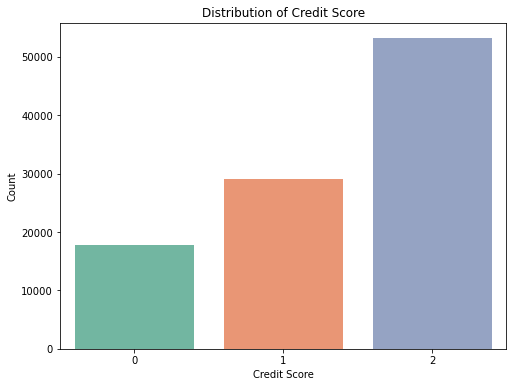

In [76]:
train_df = pd.read_csv('cleaned_train.csv')

plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='Credit_Score', palette='Set2')
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

# 2. Correlation Matrix (for numerical columns)

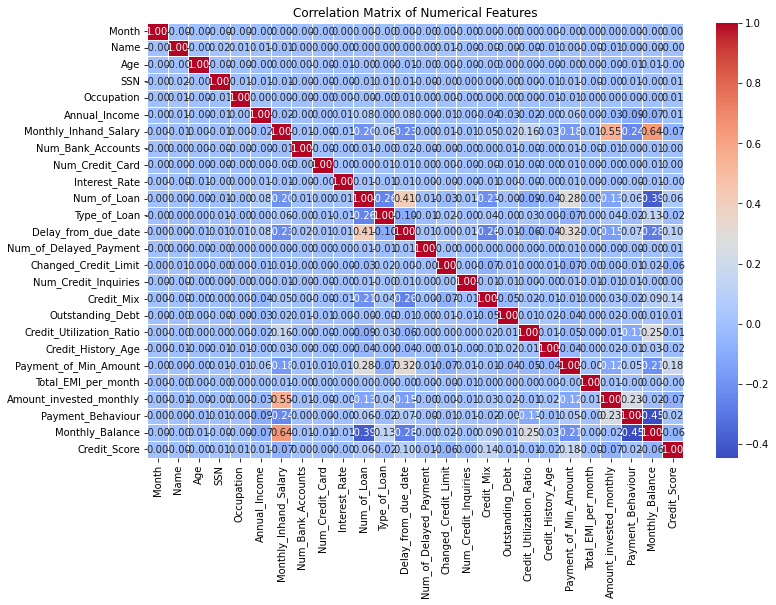

In [77]:
plt.figure(figsize=(12, 8))
corr_matrix = train_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 3. Scatter Plot of Annual_Income vs Credit_Score

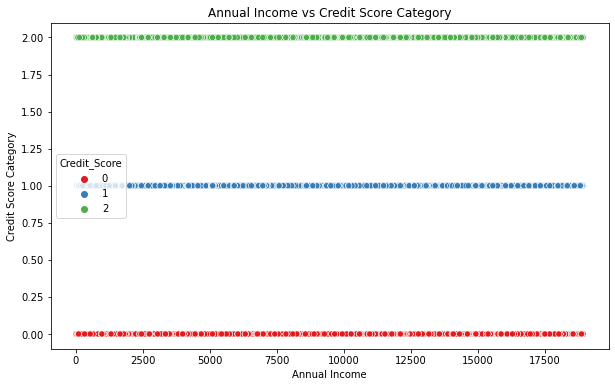

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='Annual_Income', y='Credit_Score', hue='Credit_Score', palette='Set1')
plt.title('Annual Income vs Credit Score Category')
plt.xlabel('Annual Income')
plt.ylabel('Credit Score Category')
plt.show()

# 4. Box Plot to show Credit Score across different Occupations

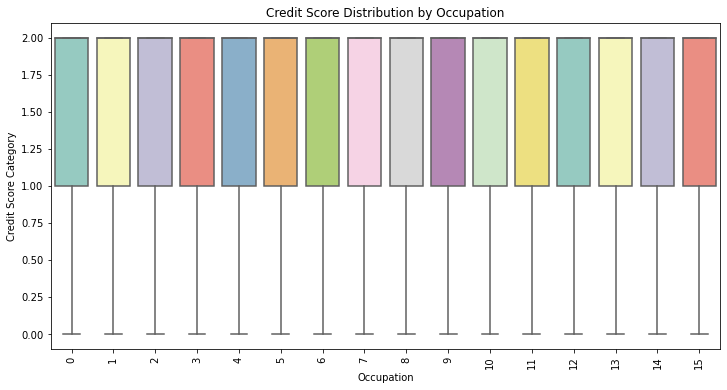

In [79]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='Occupation', y='Credit_Score', palette='Set3')
plt.title('Credit Score Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Credit Score Category')
plt.xticks(rotation=90)
plt.show()